# import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# define path

path = r'/Users/alisoncoolidge/Desktop/Happiness Project'

In [4]:
# import data

df = pd.read_csv(os.path.join(path, 'Datasets', 'happiness_data_clean_v3.csv'))

In [5]:
df.shape

(2089, 13)

In [6]:
df.head(5)

,Unnamed: 0,Country name,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [7]:
df.dtypes

Unnamed: 0                             int64
Country name                          object
year                                   int64
Life Ladder                          float64
GDP per capita                       float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
dtype: object

In [8]:
# creating new df to remove categorical data (country names and year)

df2 = df[['Life Ladder', 'GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government']]


In [9]:
df2.head(5)

,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [10]:
# remove missing values

df3 = df2.dropna()

In [11]:
df3.isnull().sum()

Life Ladder                          0
GDP per capita                       0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption            0
Positive affect                      0
Negative affect                      0
Confidence in national government    0
dtype: int64

# elbow technique

In [12]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] 

score

[-97110.1324091718,
 -29888.338243912473,
 -17681.366604839393,
 -12429.346464342685,
 -8906.205186222789,
 -6444.009504814421,
 -5244.999615577281,
 -4321.938902060366,
 -3805.5092527972474]

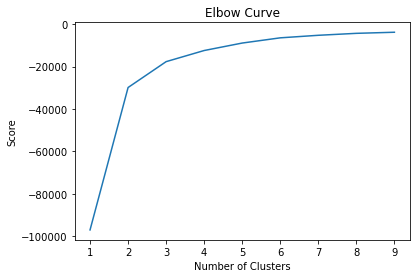

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

Explain why you chose that number in a markdown cell.

     - I am using 3 clusters because that is where the elbow curve levels off. 


# running k means algorithm

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df3)

KMeans(n_clusters=3)

In [17]:
df3['clusters'] = kmeans.fit_predict(df3)

/var/folders/10/8hf3p2hn5ms0jf4674zk04vm0000gn/T/ipykernel_36081/2121862071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


In [18]:
df3.head(5)

,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,clusters
0,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,2
1,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,2
2,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,2
3,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,2
4,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,2


In [19]:
df3['clusters'].value_counts()

1    700
0    623
2    424
Name: clusters, dtype: int64

# visualizations 

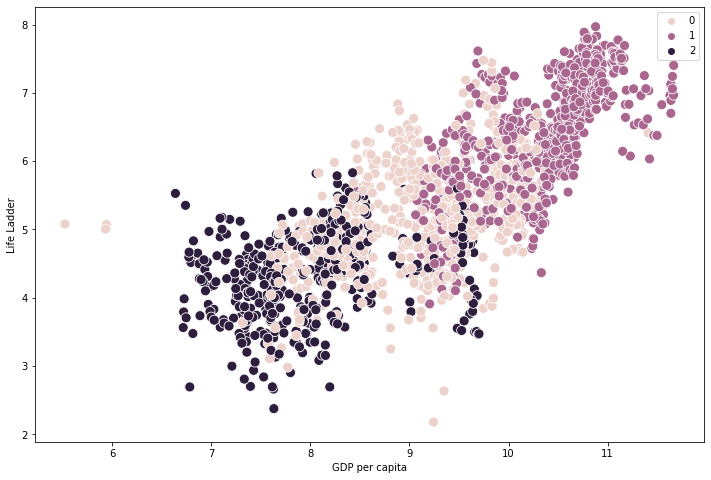

In [20]:
# Plotting the clusters for the GDP and life ladder

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['GDP per capita'], y=df3['Life Ladder'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Life Ladder') 
plt.show()

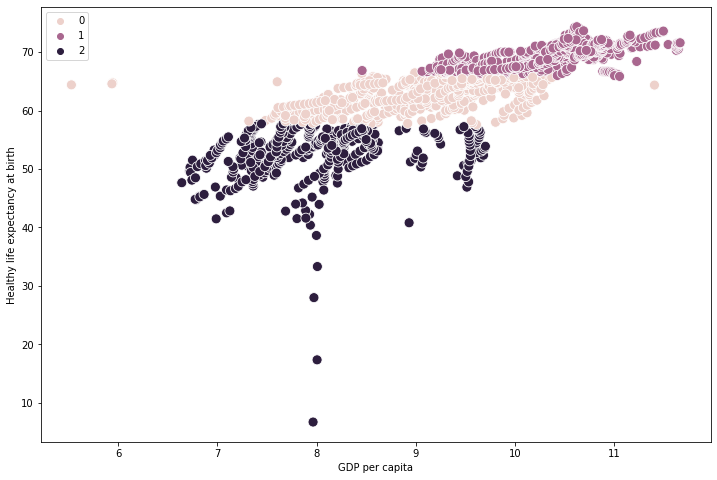

In [21]:
# Plotting the clusters for the GDP and life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['GDP per capita'], y=df3['Healthy life expectancy at birth'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Healthy life expectancy at birth') 
plt.show()

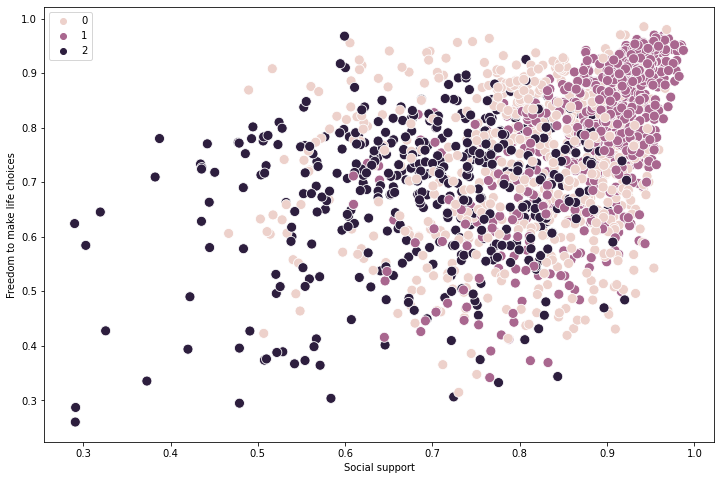

In [22]:
# Plotting the clusters for the social support and freedom to make life choices

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Social support'], y=df3['Freedom to make life choices'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Social support') 
plt.ylabel('Freedom to make life choices') 
plt.show()

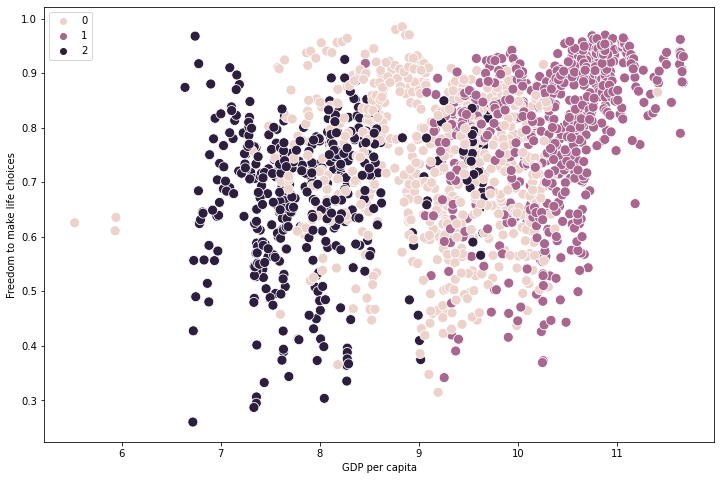

In [23]:
# Plotting the clusters for the GDP and freedom to make life choices

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['GDP per capita'], y=df3['Freedom to make life choices'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Freedom to make life choices') 
plt.show()

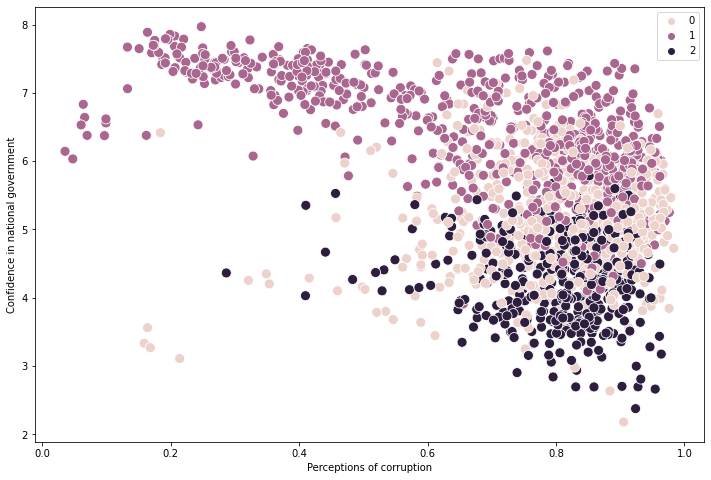

In [24]:
# Plotting the clusters for the perceptions of corruption and confidence in national government

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Perceptions of corruption'], y=df3['Life Ladder'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Perceptions of corruption') 
plt.ylabel('Confidence in national government') 
plt.show()

# discussion on visualizations

As noticed in pervious analysis, GDP per capita seems to have the strongest relationship with indicators of happiness. In the GDP + life ladder, there is some overlap between groups, which makes sense that spending power would be a strong variable for happiness, but not everything. Similarly, there is very clear groupings for GDP per capita and healthy life expecancy, which makes sense since we know that spending power and access to healthcare and healthy lifestyles are strongly related. Social support and freedom was a very mixed visualization, as these two variables don't have a clear relationship. However when we swap social support for GDP per capita, the clear and defined clusters begin to reemerge. Lastly, there's an interesting visual for confidence in government and perceptions of corruption. Knowing that some governments may be very corrupt, but also very stable and autocratic (such as Russia) or both very corrupt and very instable (such as Afghanistan) or somewhere in the middle (such as Venezuela) this visual seems to be a good representation of how those clusters would overlap in the middle and diverge on the ends. 

# calculating descriptive statistics

In [25]:
df3.loc[df3['clusters'] == 2, 'cluster'] = 'dark purple'
df3.loc[df3['clusters'] == 1, 'cluster'] = 'purple'
df3.loc[df3['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/10/8hf3p2hn5ms0jf4674zk04vm0000gn/T/ipykernel_36081/21599998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
df3.groupby('cluster').agg({'Life Ladder':['mean', 'median'], 
                         'GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                         'Healthy life expectancy at birth':['mean', 'median'],
                         'Freedom to make life choices':['mean', 'median'],
                         'Generosity':['mean', 'median'], 
                         'Perceptions of corruption':['mean', 'median'], 
                         'Positive affect':['mean', 'median'],
                         'Negative affect':['mean', 'median'],
                         'Confidence in national government':['mean', 'median']})

Life Ladder           GDP per capita            Social support  \
                   mean    median           mean     median           mean   
cluster                                                                      
dark purple    4.309509  4.337101       7.972770   7.929100       0.694463   
pink           5.201562  5.153990       9.125078   9.238946       0.803260   
purple         6.426042  6.452341      10.372884  10.496653       0.889735   

                      Healthy life expectancy at birth             \
               median                             mean     median   
cluster                                                             
dark purple  0.711035                        52.433979  53.210001   
pink         0.821299                        62.940345  63.500000   
purple       0.909815                        69.463171  69.760002   

            Freedom to make life choices           Generosity            \
                                    mean    median       mean    median   
cluster                                                                   
dark purple                     0.679061  0.708146   0.002910 -0.012871   
pink                            0.725458  0.733004  -0.016339 -0.046349   
purple                          0.805024  0.832584   0.018960 -0.010167   

            Perceptions of corruption           Positive affect            \
                                 mean    median            mean    median   
cluster                                                                     
dark purple                  0.806892  0.824024        0.631745  0.638467   
pink                         0.800796  0.814568        0.638318  0.638377   
purple                       0.676224  0.763465        0.690755  0.713959   

            Negative affect           Confidence in national government  \
                       mean    median                              mean   
cluster                                                                   
dark purple        0.284381  0.268328                          0.539991   
pink               0.275472  0.268023                          0.497838   
purple             0.256122  0.245635                          0.438823   

                       
               median  
cluster                
dark purple  0.551521  
pink         0.467046  
purple       0.416916

# discussion on results

Based on these results, it would be worth exploring how GDP per capita relates to each of the other variables. In other words, is spending power truly a leading factor in personal perceptions of happiness? Additionally, given the large differences between each cluster's mean and median on healthy life expectancy at birth, that is also worth exploring in relation to the rest of the variables. Likewise, freedom to make life choices is worth further analysis and exploration as to how that relates to other variables, especially those that are political in nature- corruption and confidence in national government. This analysis further cemented that GDP, life expectancy, and freedom are the strongest leading indicators of happiness. 

### exporting df3 to use clusters variable for visualizations in tableau

In [27]:
df3.to_csv(os.path.join(path, 'Datasets', 'happiness_clusters.csv'))